In [5]:
import numpy as np
from tqdm import tqdm
import struct

In [6]:
# def load_kitti_labels(label_file_path):
#     # Load labels as 32-bit unsigned integers
#     labels = np.fromfile(label_file_path, dtype=np.uint32)
    
#     # Extract the semantics by masking out the instance id (only keep the lower 16 bits)
#     semantic_labels = labels & 0xFFFF  # Only lower 16 bits are semantic label
    
#     return semantic_labels

def load_kitti_labels(filename):
  """ read labels from given file. """
  contents = bytes()
  with open(filename, "rb") as f:
    f.seek(0, 2)  # move the cursor to the end of the file
    num_points = int(f.tell() / 4)
    f.seek(0, 0)
    contents = f.read()

  arr = [struct.unpack('<I', contents[4 * i:4 * i + 4])[0] for i in range(num_points)]
  arr = np.array(arr)

  return arr


In [7]:
def load_from_bin(bin_path):
    obj = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)
    return obj[:,:3]

In [8]:
sequence_id = 0
scan_id = 0

downsampled_pcd = np.load(f'../data/Rellis/downsampled/{sequence_id:02}/{scan_id:06}.npy')
pcd = load_from_bin(f'../data/Rellis/sequences/{sequence_id:02}/vel_cloud_node_kitti_bin/{scan_id:06}.bin')
labels = load_kitti_labels(f'../data/Rellis/sequences/{sequence_id:02}/vel_cloud_node_semantickitti_label_id/{scan_id:06}.label')

In [10]:
labels

[0,
 0,
 0,
 23,
 3,
 0,
 23,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 23,
 23,
 23,
 0,
 23,
 0,
 0,
 0,
 0,
 23,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 23,
 23,
 23,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 23,
 0,
 23,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 23,
 3,
 23,
 0,
 23,
 23,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 0,
 23,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 23,
 3,
 0,
 0,
 3,
 0,
 23,
 23,
 23,
 23,
 0,
 0,
 0,
 23,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 18,
 0,
 0,
 0,
 23,
 3,
 23,
 23,
 23,
 0,
 0,
 0,
 23,
 0,
 0,
 23,
 3,
 0,
 0,
 0,
 0,
 18,
 0,
 0,
 0,
 23,
 3,
 23,
 23,
 23,
 0,
 0,
 0,
 23,
 0,
 0,
 23,
 3,
 3,
 0,
 0,
 0,
 18,
 0,
 0,
 23,
 0,
 23,
 23,
 23,
 18,
 0,
 0,
 23,
 0,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 18,
 0,
 0,
 0,
 23,
 3,
 0,
 23,
 23,

In [9]:
downsampled_pcd.shape, pcd.shape, labels.shape

AttributeError: 'list' object has no attribute 'shape'

In [16]:
import numpy as np

unique_numbers = np.unique(labels)
print(unique_numbers)

[ 0  3  4 17 18 19 23 31 33]


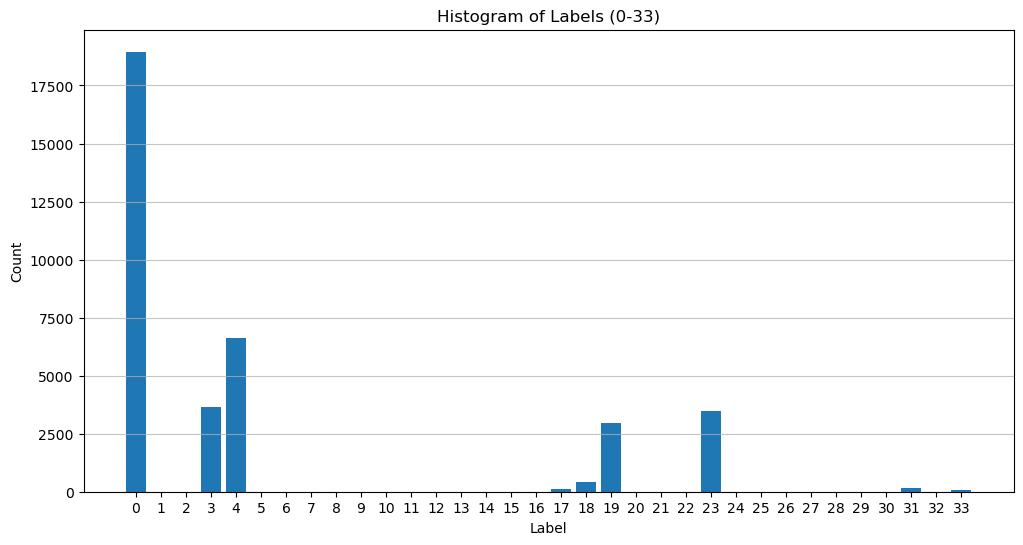

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(labels, bins=np.arange(0, 35, 1), align='left', rwidth=0.8)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Labels (0-33)')
plt.xticks(np.arange(0, 34, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [10]:
largest_count_downsampled = 0
largest_count_pcd = 0

for i in tqdm(range(1000)):
    scan_id = i

    downsampled_pcd = np.load(f'../data/Rellis/downsampled/{sequence_id:02}/{scan_id:06}.npy')
    pcd = load_from_bin(f'../data/Rellis/sequences/{sequence_id:02}/os1_cloud_node_kitti_bin/{scan_id:06}.bin')
    
    if downsampled_pcd.shape[0] > largest_count_downsampled:
        largest_count_downsampled = downsampled_pcd.shape[0]
    
    if pcd.shape[0] > largest_count_pcd:
        largest_count_pcd = pcd.shape[0]

print(largest_count_downsampled, largest_count_pcd)

  9%|▉         | 93/1000 [00:00<00:00, 924.18it/s]

100%|██████████| 1000/1000 [00:01<00:00, 701.10it/s]

24359 131072
